<a href="https://colab.research.google.com/github/akmal1994/Capstone---Classification/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [4]:
# Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_roc_curve
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold

In [5]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [6]:
# import dataset
raw_df = pd.read_excel('/content/drive/MyDrive/Alma Better/Capstone Projects/Supervised ML -Classification/default of credit card clients.xls')
df = pd.read_excel('/content/drive/MyDrive/Alma Better/Capstone Projects/Supervised ML -Classification/default of credit card clients.xls', header=1)

In [7]:
raw_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [8]:
# Checking first 5 rows and columns of dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Basic EDA

### Dataset Exploration

In [9]:
# To check the rows and columns of dataset
df.shape

(30000, 25)

In [10]:
# To set the number of columns view
pd.options.display.max_columns = 50

In [11]:
# To check the top 10 rows and all columns of dataset
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [12]:
# To check the null values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There is no null values in our dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

We can say that all columns are integer, but actually there are several categorical columns also. We need to take care for these categorical columns later.

In [14]:
# Seperating categorical columns
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

In [15]:
# Converting categorical column into object type
df[cat_cols] = df[cat_cols].astype(str)

In [16]:
# Check the stats of all numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0


In [17]:
# After converting categorical columns type check the columns informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [18]:
# Check the cardinality of the columns
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In the descriptions it is mentions that the unique values for Education are 1,2,3,4. But in the dataset we can see there are 3 more different types of entries which are 0,5,6.

As next step we will consider all the new entries belonging in 4th categories and will replace them with 4.

In [19]:
# Replacing the new values with 4 in Education column
df['EDUCATION'].replace({'5':'4', '6':'4', '0':'4'}, inplace=True)

In [20]:
# To check the unique values in gender column
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [21]:
# To check the unique values in marriage column
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Again with marriage column also we will convert 0 as 3, since we don't have the description for that. So, considering 0 as 3

In [22]:
# Replacing 0 with 3 for Marriage column
df.MARRIAGE.replace({'0':'3'}, inplace=True)

In [23]:
# After replacement checking the values
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

### Visual Representation

In [24]:
# plot function
"""
Create a function for continious columns, which will bin the continious variables and plot a graph with respect to target variables \n
for better understanding or visual representation
"""
def plot_binned(col, title, bin_num): # defining a functions with parameters
    bins=np.linspace(min(df[col]), max(df[col]), bin_num) # creating a bins
    print(bins)
    labels=['B'+str(i) for i in range(bin_num-1)]
    # binning
    df[col+'_bin']=pd.cut(df[col], bins, labels=labels, include_lowest=True)
    return df.groupby(col+'_bin')['default payment next month'].value_counts(normalize=True).unstack().plot(kind='bar', title=title, figsize=(12,6));

[  10000.  257500.  505000.  752500. 1000000.]


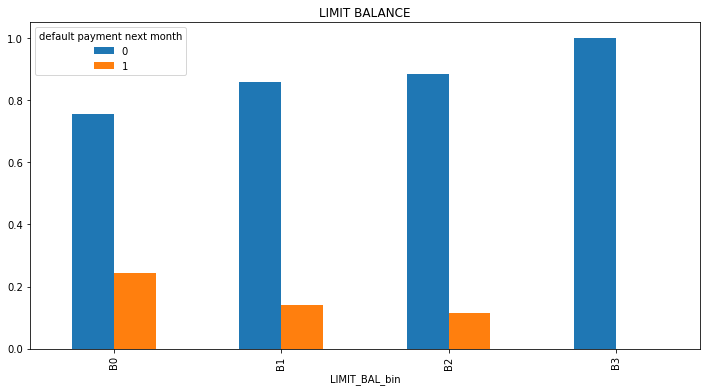

In [25]:
# To check the default rate with limit balance
plot_binned('LIMIT_BAL', 'LIMIT BALANCE', 5);

**Observation:**
- The lower the limit the higher the chances for being default
- With highest limit no default is recorded

[21.         40.33333333 59.66666667 79.        ]


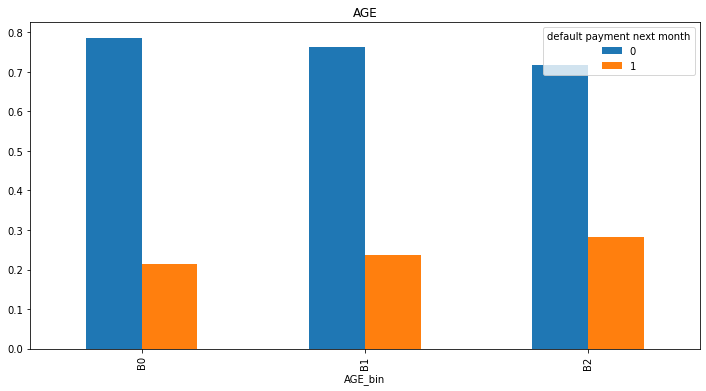

In [26]:
# To check the default rate with age group
plot_binned('AGE', 'AGE', 4)

In [27]:
def boxplot_binned(col, title, bin_num): # defining a functions with parameters
    bins=np.linspace(min(df[col]), max(df[col]), bin_num) # creating a bins
    print(bins)
    labels=['B'+str(i) for i in range(bin_num-1)]
    # binning
    df[col+'_bin']=pd.cut(df[col], bins, labels=labels, include_lowest=True)
    return df.groupby(col+'_bin')['default payment next month'].value_counts(normalize=True).unstack().plot(kind='box', title=title, figsize=(12,6));

[  10000.  257500.  505000.  752500. 1000000.]


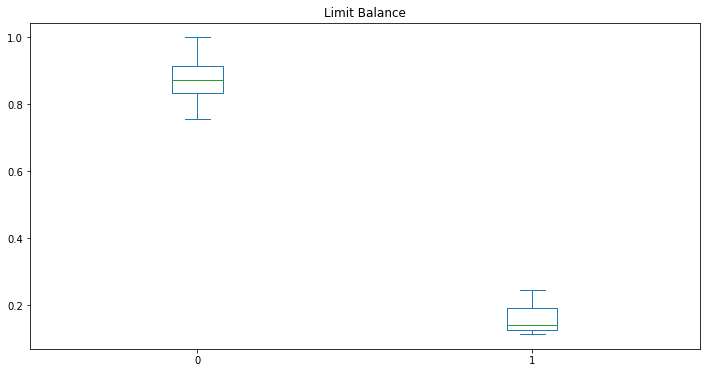

In [29]:
boxplot_binned('LIMIT_BAL', 'Limit Balance', 5);

If we see the above graph then it is clear that defaulters are with low limit

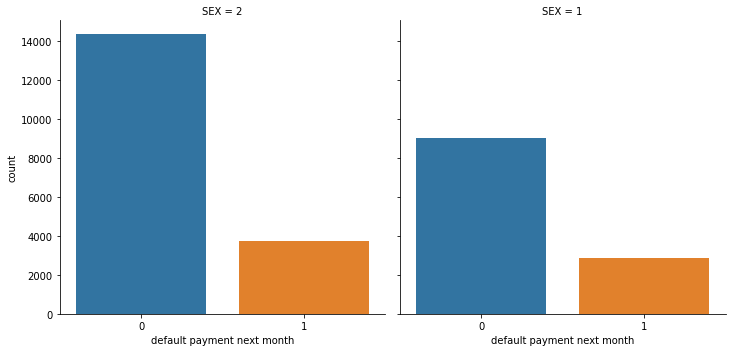

In [30]:
# To check the default rate with respect to gender
sns.factorplot("default payment next month", col='SEX', col_wrap=3, data=df, kind='count');

From above graph we can say that male has higher chances of being default compared to female.

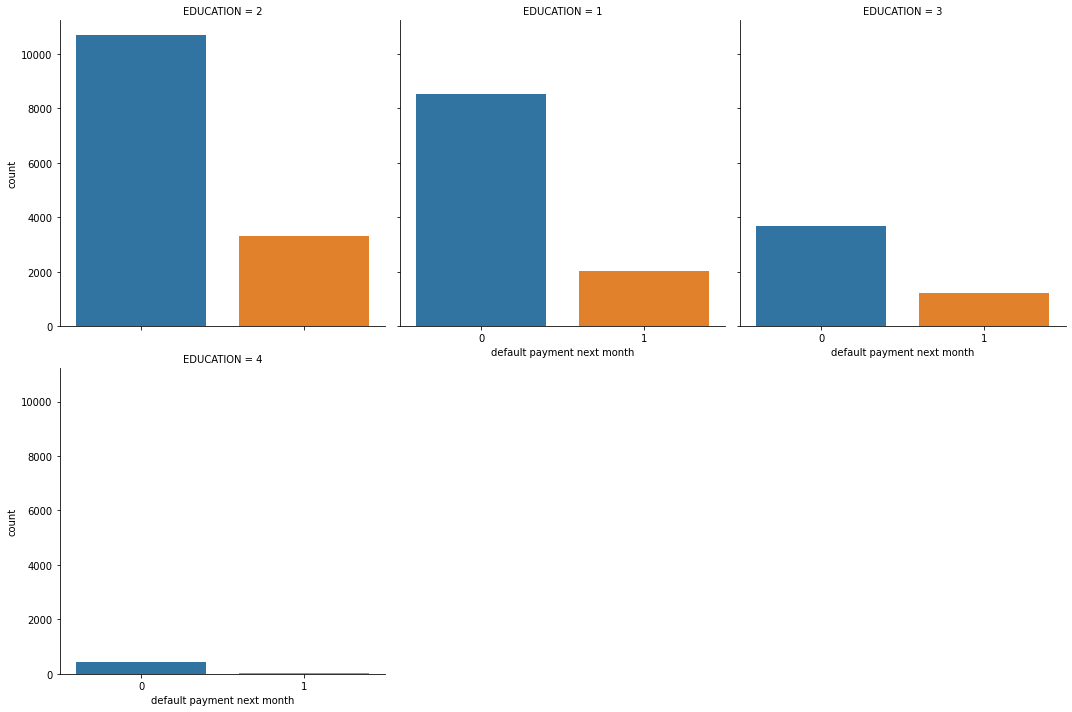

In [31]:
# To check the default rate with respect to Education
sns.factorplot("default payment next month", col='EDUCATION', col_wrap=3, data=df, kind='count');

If we see tha ration of being default among all these education then, we can realize that the higher the education the lower the rate of being deefault.

# Feature Engineering

### Splitting target and independent variables

In [32]:
# Defining independent and target variables
X = df.drop(['ID', 'default payment next month', 'LIMIT_BAL_bin', 'AGE_bin'], axis=1)
y = df['default payment next month']

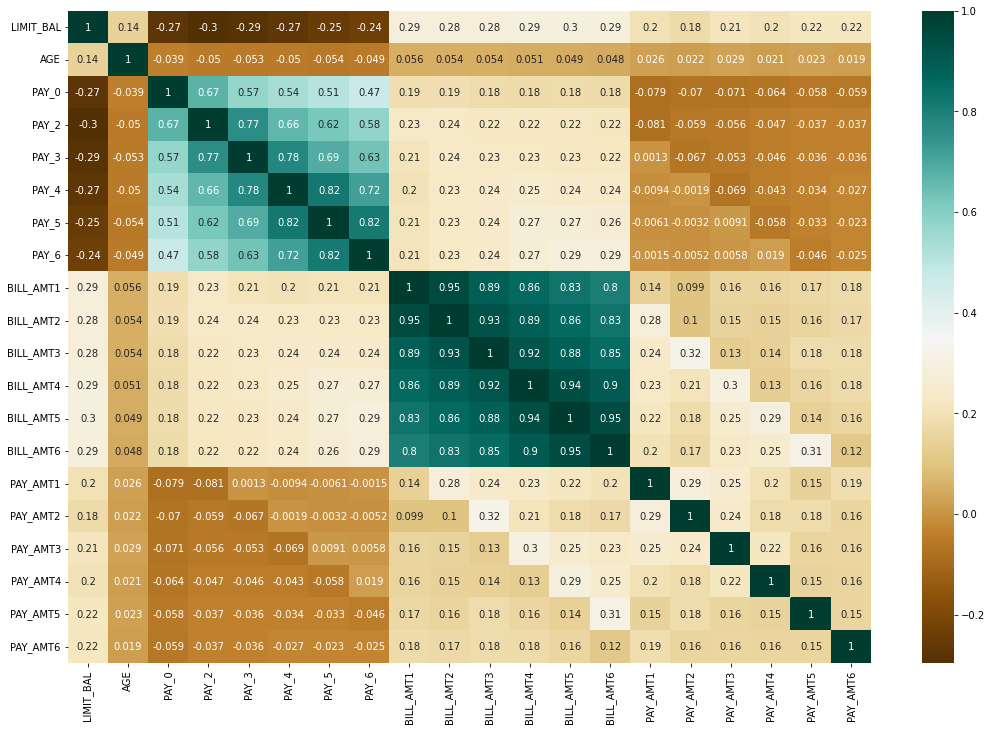

In [38]:
# Correlation matrics for attributes
plt.figure(figsize=(18,12))
sns.heatmap(X.corr(), cmap='BrBG', annot=True)

The balance amount columns are highly correlated but we will not drop the columns, we will try to build our model with all columns.

In [34]:
# One hot encoding for categorical columns
"""
We need to convert all object types columns to machine readable format which is numerical, we can want keep the column as categorical and same time need to convert it to \n
numerical format. So the better way is to dummify all the columns in one hot encoding format. It will convert categorical columns into 1 and 0 format.
"""
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
X.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0,0,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,1,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,1,0,0,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,0


# Model Building

In [35]:
# To check the class distribution
Counter(y)

Counter({1: 6636, 0: 23364})

From above we can say that the data is imbalanced. Let's try to build a model without treating imbalanced dataset, then we will treat the imbalance class and train our model and check the performance before and after treating imbalance class.

### Without handling class imbalance

In [36]:
# Split dataset into two part one for training and other for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Scaling dataset to avoide biasness
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_test.columns)

X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X_train.columns)

#### Logistic Regression with randomized search

In [37]:
# Logistic Regression
"""
Finding best hyperparameters for logistic regressing using randomized search cross validation.
First we will train with all the hyperparameters on the dataset and then will check the best hyperparameters,\n
then will train the dataset with the best hyperparameter for better output
"""
# Initializing Algorithm
log_reg = LogisticRegression()

# Defining sets of hyperparameters
parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]


# Training with the sets of hyperparameters
log_rscv_search = RandomizedSearchCV(log_reg,
                            parameters,
                            scoring='roc_auc',
                            cv=5,
                            n_iter = 60,
                            random_state=10,
                            n_jobs=4,
                            refit=True)
log_rscv_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=60, n_jobs=4,
                   param_distributions=[{'solver': ['newton-cg', 'lbfgs',
                                                    'liblinear', 'sag',
                                                    'saga']},
                                        {'penalty': ['none', 'elasticnet', 'l1',
                                                     'l2']},
                                        {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
                   random_state=10, scoring='roc_auc')

In [38]:
# Finding the best estimator
log_model = log_rscv_search.best_estimator_

In [39]:
# Training dataset with the best estimator (Hyperparameters)
log_model.fit(X_train, y_train)

# Predicting on training set and test set
log_train_pred = log_model.predict(X_train)
log_test_pred = log_model.predict(X_test)

In [40]:
# Checking model accuracy on train set and test set
print(f"Accuracy for training set is \n{accuracy_score(y_train, log_train_pred)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, log_test_pred)}")

Accuracy for training set is 
0.810625


Accuracy for test set is 
0.8148333333333333


In [41]:
# Checking model performance on train set
print(f"Classification report for training \n \n{classification_report(y_train, log_train_pred)}")

Classification report for training 
 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18668
           1       0.72      0.24      0.36      5332

    accuracy                           0.81     24000
   macro avg       0.77      0.61      0.62     24000
weighted avg       0.80      0.81      0.77     24000



In [42]:
# Checking model performance on test set
print(f"Classification report for testing \n \n{classification_report(y_test, log_test_pred)}")

Classification report for testing 
 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4696
           1       0.72      0.24      0.36      1304

    accuracy                           0.81      6000
   macro avg       0.77      0.61      0.63      6000
weighted avg       0.80      0.81      0.78      6000



---

#### Decision Tree

In [43]:
# Decision Tree Classifier without handling class imbalanced

"""
Finding best hyperparameters for decision tree classifier using randomized search cross validation over the given dataset.
Here we will try to findout the maximum depth, criterion, minimum sample leaf, minimum split and the best combination among these.
"""
# Initializing Algorithm
dtree = DecisionTreeClassifier()

# Defining sets of hyperparameters
param_grid = {
    'max_depth': np.arange(3,15),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Training with the sets of hyperparameters
dtree_rscv = RandomizedSearchCV(dtree, 
                           param_grid, 
                           scoring= 'roc_auc',
                           cv = 5,
                           random_state = 10, 
                           refit=True)
dtree_rscv.fit(X_train,y_train)

# Finding the best estimator
"""
We can check the best scores, best estimators, best parameters, and we will initialize our model with best hyperparameter using best_estimator_ \n
or we can aslo do best_params_ to initialize with best scoring combinations of hyperparameters
"""
dt_model = dtree_rscv.best_estimator_
dt_model

DecisionTreeClassifier(max_depth=11, min_samples_leaf=100, min_samples_split=50)

In [44]:
# Training dataset with the best estimator (Hyperparameters)
dt_model.fit(X_train, y_train)

# Predicting on training set and test set
dtree_pred_train = dt_model.predict(X_train)
dtree_pred_test = dt_model.predict(X_test)

# Checking model performance on train set and test set
print(f"Accuracy for training set is \n{accuracy_score(y_train, dtree_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, dtree_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, dtree_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, dtree_pred_test)}")

Accuracy for training set is 
0.8230833333333333


Accuracy for test set is 
0.82


Classification report for training: 
 
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     18668
           1       0.70      0.36      0.48      5332

    accuracy                           0.82     24000
   macro avg       0.77      0.66      0.68     24000
weighted avg       0.81      0.82      0.80     24000



Classification report for testing: 
 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4696
           1       0.66      0.36      0.46      1304

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



---

#### Random Forest

In [45]:
# Random Forest Classifier
"""
In this section we will try to find the best hyperparameter using randomizedsearchcv, the reason for using this is because it takes less time computation than grid search.
Drawback of this process is this can miss the best hyperameter of the model.
"""
# Initialize the model
RF = RandomForestClassifier()

# Defining sets of hyperparameters
param_grid = param_grid = { 
    'n_estimators': [200, 300,400,500,600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Training with the sets of hyperparameters
rscv_rf = RandomizedSearchCV(RF, param_grid, 
                    cv=3,scoring='roc_auc',
                    random_state=10,
                    refit=True)
rscv_rf.fit(X_train, y_train)

# Finding the best estimator
rf_model = rscv_rf.best_estimator_
rf_model

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=400)

In [46]:
# Training dataset with the best estimator (Hyperparameters)
rf_model.fit(X_train, y_train)

# Predicting on training set and test set
ranf_pred_train = rf_model.predict(X_train)
ranf_pred_test = rf_model.predict(X_test)

# Checking model performance on train set and test set
print(f"Accuracy for training set is \n{accuracy_score(y_train, ranf_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, ranf_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, ranf_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, ranf_pred_test)}")

Accuracy for training set is 
0.8364166666666667


Accuracy for test set is 
0.8233333333333334


Classification report for training: 
 
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     18668
           1       0.75      0.39      0.52      5332

    accuracy                           0.84     24000
   macro avg       0.80      0.68      0.71     24000
weighted avg       0.83      0.84      0.82     24000



Classification report for testing: 
 
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      4696
           1       0.66      0.38      0.48      1304

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



---

#### Knn

In [47]:
# K Nearest Neighbour
# Initialize the model
knn = KNeighborsClassifier()

# Defining sets of hyperparameters
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)

# Training with the sets of hyperparameters
knn_rscv = RandomizedSearchCV(knn, param_grid, cv = 5, scoring = 'roc_auc')
knn_rscv.fit(X_train,y_train)

# Finding the best estimator
knn_model = knn_rscv.best_estimator_

In [48]:
# Training dataset with the best estimator (Hyperparameters)
knn_model.fit(X_train, y_train)

# Predicting on training set and test set
knn_pred_train = knn_model.predict(X_train)
knn_pred_test = knn_model.predict(X_test)

# Checking model performance on train set and test set
print(f"Accuracy for training set is \n{accuracy_score(y_train, knn_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, knn_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, knn_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, knn_pred_test)}")

Accuracy for training set is 
0.8178333333333333


Accuracy for test set is 
0.8126666666666666


Classification report for training: 
 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     18668
           1       0.69      0.32      0.44      5332

    accuracy                           0.82     24000
   macro avg       0.76      0.64      0.67     24000
weighted avg       0.80      0.82      0.79     24000



Classification report for testing: 
 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4696
           1       0.64      0.31      0.42      1304

    accuracy                           0.81      6000
   macro avg       0.74      0.63      0.65      6000
weighted avg       0.79      0.81      0.79      6000



---

#### Gradient Boosting

In [49]:
# set up the model
gbm = GradientBoostingClassifier(random_state=0)

# determine the hyperparameter space
param_grid = dict(
    n_estimators=stats.randint(10, 120),
    min_samples_split=stats.uniform(0, 1),
    max_depth=stats.randint(1, 5),
    loss=('deviance', 'exponential'),
    )

# set up the search
gbm_rscv = RandomizedSearchCV(gbm,
                            param_grid,
                            scoring='roc_auc',
                            cv=5,
                            n_iter = 60,
                            random_state=10,
                            n_jobs=4,
                            refit=True)

# find best hyperparameters
gbm_rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=60, n_jobs=4,
                   param_distributions={'loss': ('deviance', 'exponential'),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f88e4083160>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f88e40c77f0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f88e4083ac0>},
                   random_state=10, scoring='roc_auc')

In [50]:
# find best hyperparameters
gbm_model = gbm_rscv.best_estimator_

In [51]:
# Training dataset with the best estimator (Hyperparameters)
gbm_model.fit(X_train, y_train)

# Predicting on training set and test set
gbm_pred_train = gbm_model.predict(X_train)
gbm_pred_test = gbm_model.predict(X_test)

# Checking model performance on train set and test set
print(f"Accuracy for training set is \n{accuracy_score(y_train, gbm_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, gbm_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, gbm_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, gbm_pred_test)}")

Accuracy for training set is 
0.8229166666666666


Accuracy for test set is 
0.8226666666666667


Classification report for training: 
 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     18668
           1       0.68      0.38      0.49      5332

    accuracy                           0.82     24000
   macro avg       0.76      0.66      0.69     24000
weighted avg       0.81      0.82      0.80     24000



Classification report for testing: 
 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4696
           1       0.66      0.39      0.49      1304

    accuracy                           0.82      6000
   macro avg       0.75      0.67      0.69      6000
weighted avg       0.81      0.82      0.80      6000



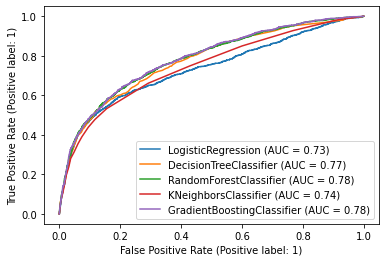

In [52]:
# Plot roc auc curve
"""
To check the performance of individual model using area under the curve and with roc auc score, the greater the area under \n
the curve the better the model performance among all these. Plotting all roc auc curve in a same axis.
"""
roc=plot_roc_curve(log_model,X_test,y_test)
plot_roc_curve(dt_model,X_test,y_test,ax=roc.ax_);
plot_roc_curve(rf_model,X_test,y_test,ax=roc.ax_);
plot_roc_curve(knn_model,X_test,y_test,ax=roc.ax_);
plot_roc_curve(gbm_model,X_test,y_test,ax=roc.ax_);

**OBSERVATIONS:**
- From above model we can observe that almost all algorithm accuracy is more than 80% but the recall is very low, since we are working on imbalanced dataset we should care for our indepth performance rather than just accuracy.
- Model in training and test data are performing same, which is not overfitting but not giving the best requirements of the need.
- Simply we cannot build any model with this simple imbalanced dataset. Treating imbalance become the most important for the performance of the algorithm.

----
---

### With handling class imbalanced

To handling imbalanced we can do two things which is either under sample the majority class or over sample the minority class.

But there is a problem with under sampling, as we know that the under sampling will remove some points from majority class which might loss some important points, omitting data points are not a good practice.

We will go with over sampling which also is not good as this technique will create too much duplicates of minoruty class but at least we are not loosing any information with this technique.

There are various over sampling techniques among these we will use ADASYN (Adaptive Synthetic). This algorithm generates synthetics data not copying the same minority class, which other oversamplig like SMOTE do.

In [53]:
# Initializing algorithm and applying on dataset

ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 23940, 0: 23364})


In [54]:
# Splitting dataset into training and testing part for training model and evaluating model performance.

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=12)

#### Logistic Regression

In [55]:
# Logistic Regression

"""
Finding best hyperparameters for logistic regressing using grid search cross validation over the given dataset.
First we will train with all the hyperparameters on the dataset and then will check the best hyperparameters,\n
then will train the dataset with the best hyperparameter for better output
"""
# Initializing Algorithm
log_reg = LogisticRegression()

# Defining sets of hyperparameters
parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]


# Training with the sets of hyperparameters
log_rscv_search = RandomizedSearchCV(log_reg,
                            parameters,
                            scoring='roc_auc',
                            cv=5,
                            n_iter = 60,
                            random_state=10,
                            n_jobs=4,
                            refit=True)
log_rscv_search.fit(X_train, y_train)

# Finding the best estimator
log_model = log_rscv_search.best_estimator_

In [56]:
# Training dataset with the best estimator (Hyperparameters)
log_model.fit(X_train, y_train)

# Predicting on training set and test set
log_train_pred = log_model.predict(X_train)
log_test_pred = log_model.predict(X_test)

In [57]:
# Checking model performance on train set and test set

print(f"Accuracy for training set is \n{accuracy_score(y_train, log_train_pred)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, log_test_pred)}")
print('\n')
print(f"Classification report for training \n \n{classification_report(y_train, log_train_pred)}")
print('\n')
print(f"Classification report for testing \n \n{classification_report(y_test, log_test_pred)}")

Accuracy for training set is 
0.7386748006764919


Accuracy for test set is 
0.7357666290868095


Classification report for training 
 
              precision    recall  f1-score   support

           0       0.73      0.75      0.74     16385
           1       0.75      0.73      0.74     16727

    accuracy                           0.74     33112
   macro avg       0.74      0.74      0.74     33112
weighted avg       0.74      0.74      0.74     33112



Classification report for testing 
 
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      6979
           1       0.75      0.72      0.74      7213

    accuracy                           0.74     14192
   macro avg       0.74      0.74      0.74     14192
weighted avg       0.74      0.74      0.74     14192



#### Decision Tree

In [58]:
# Decision Tree Classifier
"""
Finding best hyperparameters for decision tree classifier using grid search cross validation over the given dataset.
Here we will try to findout the maximum depth, criterion, minimum sample leaf, minimum split and the best combination among these.
"""

# Initializing Algorithm
dtree = DecisionTreeClassifier()

# Defining sets of hyperparameters
param_grid = {
    'max_depth': range(5, 15, 10),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Training with the sets of hyperparameters
grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           verbose = 1)

grid_search.fit(X_train,y_train)

# Finding the best estimator
"""
We can check the best scores, best estimators, best parameters, and we will initialize our model with best hyperparameter using best_estimator_ \n
or we can aslo do best_params_ to initialize with best scoring combinations of hyperparameters
"""
dt_model = grid_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [59]:
# Training dataset with the best estimator (Hyperparameters)
dt_model.fit(X_train, y_train)

# Predicting on training set and test set
dtree_pred_train = dt_model.predict(X_train)
dtree_pred_test = dt_model.predict(X_test)

# Checking model performance on train set and test set
print(f"Accuracy for training set is \n{accuracy_score(y_train, dtree_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, dtree_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, dtree_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, dtree_pred_test)}")

Accuracy for training set is 
0.7300676491906257


Accuracy for test set is 
0.7297773393461104


Classification report for training: 
 
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     16385
           1       0.77      0.67      0.72     16727

    accuracy                           0.73     33112
   macro avg       0.73      0.73      0.73     33112
weighted avg       0.73      0.73      0.73     33112



Classification report for testing: 
 
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6979
           1       0.76      0.68      0.72      7213

    accuracy                           0.73     14192
   macro avg       0.73      0.73      0.73     14192
weighted avg       0.73      0.73      0.73     14192



----

#### Random Forest with Randomized search

In [60]:
# Random Forest Classifier
"""
In this section we will try to find the best hyperparameter using randomizedsearchcv, the reason for using this is because it takes less time computation than grid search.
Drawback of this process is this can miss the best hyperameter of the model.
"""
# Initialize the model
RF = RandomForestClassifier()

# Defining sets of hyperparameters
param_grid = param_grid = { 
    'n_estimators': [200, 300,400,500,600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Training with the sets of hyperparameters
rscv_rf = RandomizedSearchCV(RF, param_grid, 
                    cv=3,scoring='roc_auc',
                    random_state=10,
                    refit=True)
rscv_rf.fit(X_train, y_train)

# Finding the best estimator
rf_model = rscv_rf.best_estimator_
rf_model

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=400)

In [61]:
# Training dataset with the best estimator (Hyperparameters)
rf_model.fit(X_train, y_train)

# Prediction on training set and test set
ranf_pred_train = rf_model.predict(X_train)
ranf_pred_test = rf_model.predict(X_test)

# Checking model performance on train set and test set
print(f"Accuracy for training set is \n{accuracy_score(y_train, ranf_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, ranf_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, ranf_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, ranf_pred_test)}")

Accuracy for training set is 
0.7913143271321575


Accuracy for test set is 
0.7781144306651635


Classification report for training: 
 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80     16385
           1       0.82      0.75      0.78     16727

    accuracy                           0.79     33112
   macro avg       0.79      0.79      0.79     33112
weighted avg       0.79      0.79      0.79     33112



Classification report for testing: 
 
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      6979
           1       0.81      0.74      0.77      7213

    accuracy                           0.78     14192
   macro avg       0.78      0.78      0.78     14192
weighted avg       0.78      0.78      0.78     14192



#### Random Forest with Grid Search

In [62]:
# Random Forest Classifier using grid search
"""
In this section we will try to find the best hyperparameter using gridsearchcv, the reason for using this is because it finds the best hyperparameter.
Drawback of this process is this takes time to computing as this will go through the all possible combinations.
"""
# Initialize model
RF = RandomForestClassifier(random_state=10)

# Defining sets of hyperparameters
param_grid = param_grid = { 
    'n_estimators': [200, 300,400,500,600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Training with the sets of hyperparameters
gridcv_rf = GridSearchCV(RF, param_grid, 
                    cv=3,scoring='roc_auc')
gridcv_rf.fit(X_train, y_train)

# Finding the best estimator
rfgrid_model = gridcv_rf.best_estimator_
rfgrid_model

RandomForestClassifier(max_depth=8, n_estimators=600, random_state=10)

In [63]:
# Training dataset with the best estimator (Hyperparameters)
rfgrid_model.fit(X_train, y_train)

# Prediction on training set and test set
ranf_pred_train = rf_model.predict(X_train)
ranf_pred_test = rf_model.predict(X_test)

# Checking model performance on train set and test set
print(f"Accuracy for training set is \n{accuracy_score(y_train, ranf_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, ranf_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, ranf_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, ranf_pred_test)}")

Accuracy for training set is 
0.7913143271321575


Accuracy for test set is 
0.7781144306651635


Classification report for training: 
 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80     16385
           1       0.82      0.75      0.78     16727

    accuracy                           0.79     33112
   macro avg       0.79      0.79      0.79     33112
weighted avg       0.79      0.79      0.79     33112



Classification report for testing: 
 
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      6979
           1       0.81      0.74      0.77      7213

    accuracy                           0.78     14192
   macro avg       0.78      0.78      0.78     14192
weighted avg       0.78      0.78      0.78     14192



In [64]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [65]:
# Defining sets of hyperparameters
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# Training with the sets of hyperparameters
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=10 )
random_search.fit(X_train, y_train)

# Finding the best estimator
xgb_model = random_search.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [66]:
# Training dataset with the best estimator (Hyperparameters)
xgb_model.fit(X_train, y_train)

# Prediction on training set and test set
xgb_pred_train = xgb_model.predict(X_train)
xgb_pred_test = xgb_model.predict(X_test)

# Checking model performance on train set and test set
print(f"Accuracy for training set is \n{accuracy_score(y_train, xgb_pred_train)}")
print('\n')
print(f"Accuracy for test set is \n{accuracy_score(y_test, xgb_pred_test)}")
print('\n')
print(f"Classification report for training: \n \n{classification_report(y_train, xgb_pred_train)}")
print('\n')
print(f"Classification report for testing: \n \n{classification_report(y_test, xgb_pred_test)}")

Accuracy for training set is 
0.8099782556172989


Accuracy for test set is 
0.8020011273957159


Classification report for training: 
 
              precision    recall  f1-score   support

           0       0.79      0.84      0.81     16385
           1       0.83      0.78      0.81     16727

    accuracy                           0.81     33112
   macro avg       0.81      0.81      0.81     33112
weighted avg       0.81      0.81      0.81     33112



Classification report for testing: 
 
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      6979
           1       0.83      0.77      0.80      7213

    accuracy                           0.80     14192
   macro avg       0.80      0.80      0.80     14192
weighted avg       0.80      0.80      0.80     14192



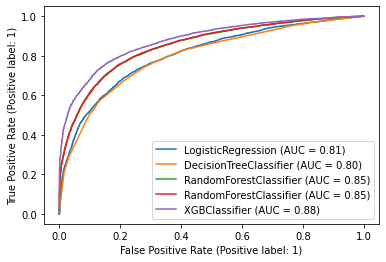

In [67]:
# Plot roc auc curve
"""
To check the performance of individual model using area under the curve and with roc auc score, the greater the area under \n
the curve the better the model performance among all these. Plotting all roc auc curve in a same axis.
"""

roc=plot_roc_curve(log_model,X_test,y_test)
plot_roc_curve(dt_model,X_test,y_test,ax=roc.ax_);
plot_roc_curve(rf_model,X_test,y_test,ax=roc.ax_);
plot_roc_curve(rfgrid_model,X_test,y_test,ax=roc.ax_);
plot_roc_curve(xgb_model,X_test,y_test,ax=roc.ax_);

# Conclusions

**OBSERVATIONS:**
- From the above modelling it can be seen that with handling imbalanced data model performance is drastically increasing. So, let's see the confusion metrics for each model performance with handling imbalanced dataset.
- Randomforest with randomized search and grid search are performing same. For the sake of less computational I would go for randomized search for randomforest classifier.
- XGboost classifier is performing great with roc_auc score 0.88, whereas randomforest is second highest with 0.85 score, and decision tree classifier is with least score of 0.80
- If we check the precision and recall among all of these then it will be:
  
  **Logistic regression**
    - Training
      - Accuracy : 0.74
      - Precision: 0.75
      - Recall   : 0.74

    - Testing
      - Accuracy  : 0.74
      - Precision : 0.75
      - Recall    : 0.72
    
  **Decision Tree Classifier**
    - Training
      - Accuracy : 0.73
      - Precision: 0.77
      - Recall   : 0.67

    - Testing
      - Accuracy  : 0.73
      - Precision : 0.76
      - Recall    : 0.68

  **Random Forest Classifier with Randomized search**
    - Training
      - Accuracy : 0.79
      - Precision: 0.82
      - Recall   : 0.75

    - Testing
      - Accuracy  : 0.79
      - Precision : 0.81
      - Recall    : 0.74

  **Random Forest Classifier with Grid search**
    - Training
      - Accuracy : 0.79
      - Precision: 0.82
      - Recall   : 0.75

    - Testing
      - Accuracy  : 0.78
      - Precision : 0.81
      - Recall    : 0.74

  **XGBoost Classifier**
    - Training
      - Accuracy : 0.81
      - Precision: 0.83
      - Recall   : 0.78

    - Testing
      - Accuracy  : 0.80
      - Precision : 0.83
      - Recall    : 0.77

- From the above reports we can see that xgboost is giving giid accuracy precision and recall as well. In all way xgboost is performing well. Since our aim highly interested in finding positive class so we will lean towards recall in this case and XGboost is giving high recall values.

- We will go ahead and deploy XGBoost model with handling class imbalanced

---